# Assignment: Linear and Logistic Regression

## 1. Business understanding

Real estate pricing is a critical factor for homebuyers, sellers, investors, and real estate agencies. Accurately predicting house prices can help stakeholders make informed decisions regarding property valuation, investment strategies, and market trends. The goal of this project is to develop predictive models for estimating real estate prices based on available features in the dataset.

In this assignment we construct two models:

- Linear Regression model: Predicts the continuous target variable to estimate real estate prices.
- Logistic Regression mode: Converts the target variable into a binary classification and predicts whether a house price falls into the higher or lower category.

#### Goals
- Identify most influential factors to real estate prices.
- Develop model that can accurately predict house prices.
- Compare the effectiveness of linear and logistic regression for this problem.

#### Our objectives
- to learn to use linear regression for predicting continuously varying target variables
- to learn to use logistic regression for binary classification
- to learn to estimate the relative importance of input features

## 2. Data understanding

In this assignment we used [Real Estate Valuation data set](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) from UCI Machine Learning Repository. The data is collected from New Taipei City, Taiwan. The data has no missing values.

#### Variable information
The inputs are as follows

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

## 3. Data preparation

We import data from the UCI Repository and split it into training and testing sets. We studied the data and decided to extract the following features for further usage: X2, X3, and X4.

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# Splitting data set for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=25)


# inputs
scaled_train = pd.DataFrame(X_train, columns=real_estate_valuation.data.feature_names)
scaled_train.columns = ['TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumOfConvenienceStores', 'Latitude', 'Longitude']
scaled_test = pd.DataFrame(X_test, columns=real_estate_valuation.data.featuren_names)
scaled_test.columns = ['TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumOfConvenienceStores', 'Latitude', 'Longitude']



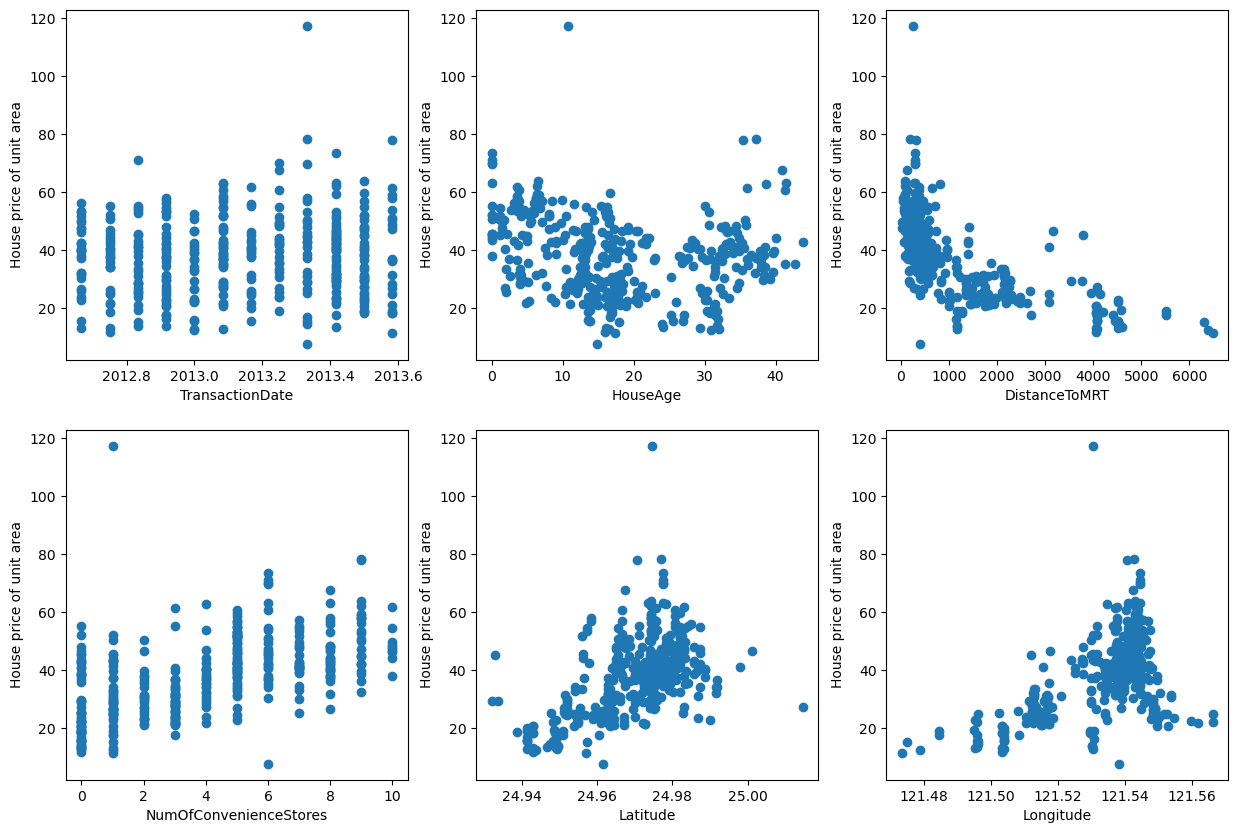

In [21]:
# check relationships between columns and price

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for index, column in enumerate(scaled_train.columns):
    axes[index].scatter(scaled_train[column], y_train)
    axes[index].set_xlabel(column)
    axes[index].set_ylabel('House price of unit area')

## 4. Modelling

We scale the data using StandardScaler to ensure that all features contribute equally to the model.

Machine learning methods:
- Linear Regression -- for continuously varying target variables.
- Logistic Regression -- for binary classification.

## Testing the model without standardizing the data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the house prices on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
formatted_coefficients = ', '.join([f'{coef:.5f}' for coef in model.coef_[0]])
print("Coefficients: ", formatted_coefficients)
print("Intercept: ", model.intercept_)

Mean Squared Error: 44.60100050364214
Mean Absolute Error: 5.222937628681782
Coefficients:  5.37585, -0.25737, -0.00424, 1.14989, 235.08966, -2.25261
Intercept:  [-16376.1796304]


## Standardize the data and test again

Mean Squared Error: 44.60100050364214
Mean Absolute Error: 5.222937628681782
Coefficients:  5.37585, -0.25737, -0.00424, 1.14989, 235.08966, -2.25261
Intercept:  [-16376.1796304]


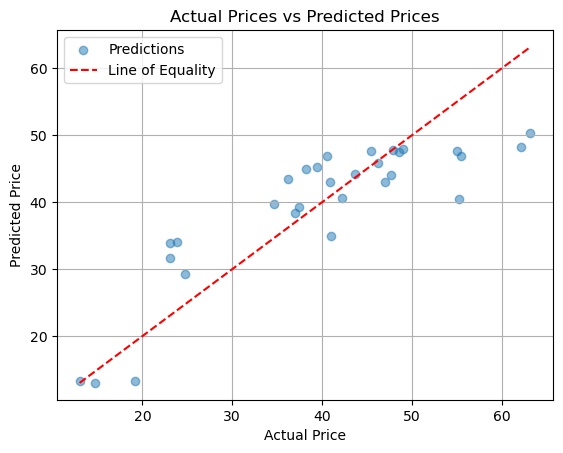

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler


# Create and fit the linear regression model
model = LinearRegression()
model.fit(scaled_train, y_train)

# Predict the house prices on the test set
predictions = model.predict(scaled_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
formatted_coefficients = ', '.join([f'{coef:.5f}' for coef in model.coef_[0]])
print("Coefficients: ", formatted_coefficients)
print("Intercept: ", model.intercept_)

# Convert y_train and predictions dataset to numpy array
y_test_np = np.array(y_test).astype(float)
predictions_np = np.array(predictions).astype(float)

# Scatter plot of actual vs predicted prices
plt.scatter(y_test_np, predictions_np, alpha=0.5, label='Predictions')

# Plot the line of equality
max_val = max(max(y_test_np), max(predictions_np))
min_val = min(min(y_test_np), min(predictions_np))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Line of Equality')

# Labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Convert target variable to binary: 1 if above average, 0 if below
y_binary = (y > y.mean()).astype(int).values.ravel()

reg = LogisticRegression()
reg.fit(X_train, y_binary)

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [384, 414]

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = cross_val_predict(estimator=reg, X=X_train, y=y_train, cv=10)

cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Estimating feature importance with permutation importance

In [ ]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, scaled_train, y_binary, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=scaled_train.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()